# Importing dataset and libraries

In [1]:
import pandas as pd
data = pd.read_csv("/Users/anishapaul/Downloads/archive-2/ks-projects-201801.csv")
print(data.head())


           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

# Dataset Preprocessing

# Checking for missing values

In [2]:
print(data.isnull().sum())

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


# Handling Missing Values

In [3]:
# Dropping the rows with missing names
data.dropna(subset=['name'], inplace=True)

# Imputing missing values in the 'usd pledged' column with the median
median_usd_pledged = data['usd pledged'].median()
data['usd pledged'].fillna(median_usd_pledged, inplace=True)

print(data.isnull().sum())


ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


# Converting Datatypes

In [4]:
print(data.dtypes)
# Convert date columns to datetime data type
data['deadline'] = pd.to_datetime(data['deadline'])
data['launched'] = pd.to_datetime(data['launched'])

# Verify the data types after conversion
print(data.dtypes)


ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object
ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object


# Identifing key variables that could significantly impact the success of the projects

# Sucess rate Calculation 

In [15]:
# Calculate success rate of projects
data['success_rate'] = data['pledged'] / data['goal']

# Check average success rate by category
average_success_rate_by_category = data.groupby('category')['success_rate'].mean().sort_values(ascending=False)

# Check average success rate by main category
average_success_rate_by_main_category = data.groupby('main_category')['success_rate'].mean().sort_values(ascending=False)

# Check average success rate by country
average_success_rate_by_country = data.groupby('country')['success_rate'].mean().sort_values(ascending=False)

# Adding average success rates as new columns in the data DataFrame
data['avg_success_rate_category'] = data['category'].map(average_success_rate_by_category)
data['avg_success_rate_main_category'] = data['main_category'].map(average_success_rate_by_main_category)
data['avg_success_rate_country'] = data['country'].map(average_success_rate_by_country)


display(data[['category', 'avg_success_rate_category', 'main_category', 'avg_success_rate_main_category', 'country', 'avg_success_rate_country']].head())



,category,avg_success_rate_category,main_category,avg_success_rate_main_category,country,avg_success_rate_country
0,Poetry,1.136669,Publishing,1.823747,GB,1.066292
1,Narrative Film,2.491213,Film & Video,1.511060,US,3.772696
2,Narrative Film,2.491213,Film & Video,1.511060,US,3.772696
3,Music,15.914126,Music,7.836019,US,3.772696
4,Film & Video,1.363901,Film & Video,1.511060,US,3.772696


#  Saving the processed CSV

In [13]:
file_path = "/Users/anishapaul/Downloads/new_kickstarter_data.csv"
data.to_csv(file_path, index=False)


# Visualisation 

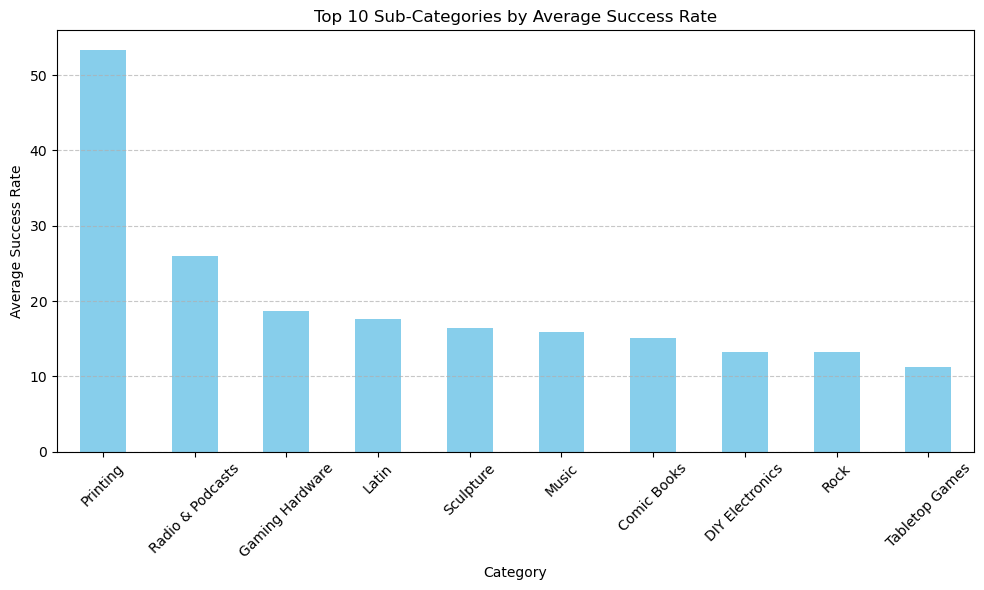

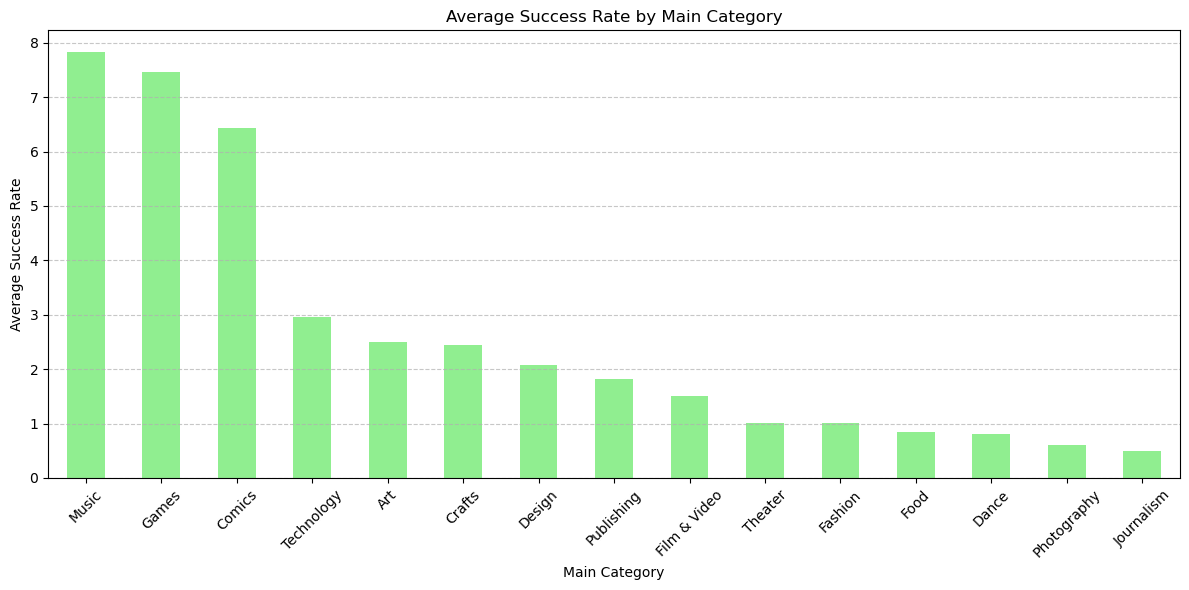

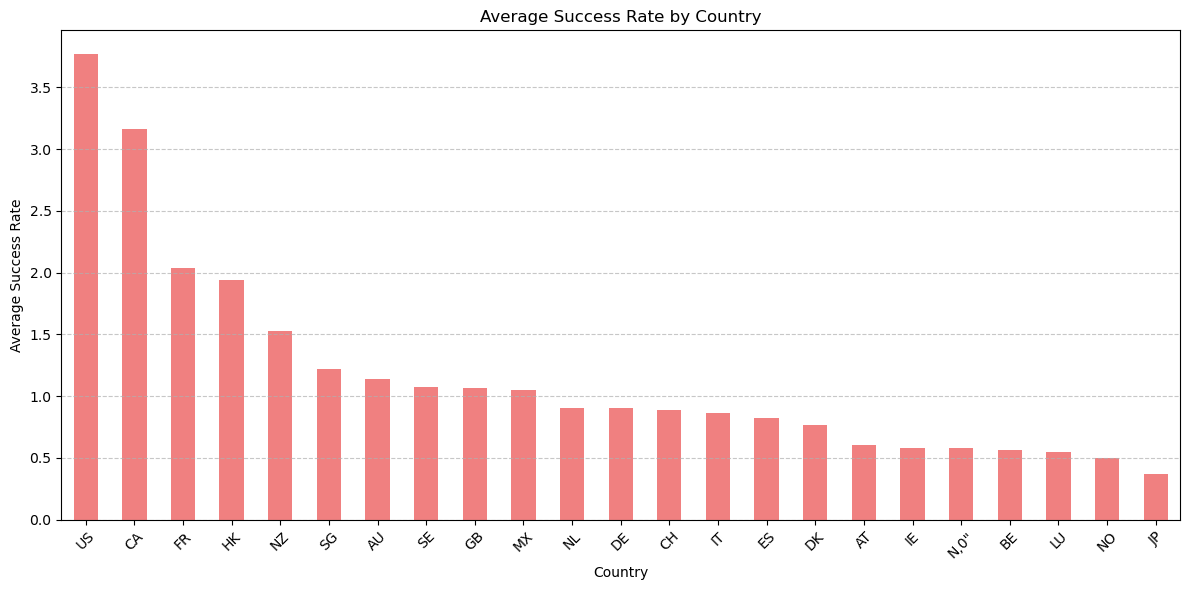

In [11]:
import matplotlib.pyplot as plt


N = 10  
top_categories = average_success_rate_by_category.head(N)

# Plot average success rate by top categories
plt.figure(figsize=(12, 8))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top {} Sub-Categories by Average Success Rate'.format(N))
plt.ylabel('Average Success Rate')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot average success rate by main category
plt.figure(figsize=(12, 6))
average_success_rate_by_main_category.plot(kind='bar', color='lightgreen')
plt.title('Average Success Rate by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Success Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot average success rate by country
plt.figure(figsize=(10, 6))
average_success_rate_by_country.plot(kind='bar', color='lightcoral')
plt.title('Average Success Rate by Country')
plt.xlabel('Country')
plt.ylabel('Average Success Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()
